In [1]:
import pandas as pd
diabetes=pd.read_csv("diabetes.csv")
diabetes.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [2]:
diabetes.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

<AxesSubplot:>

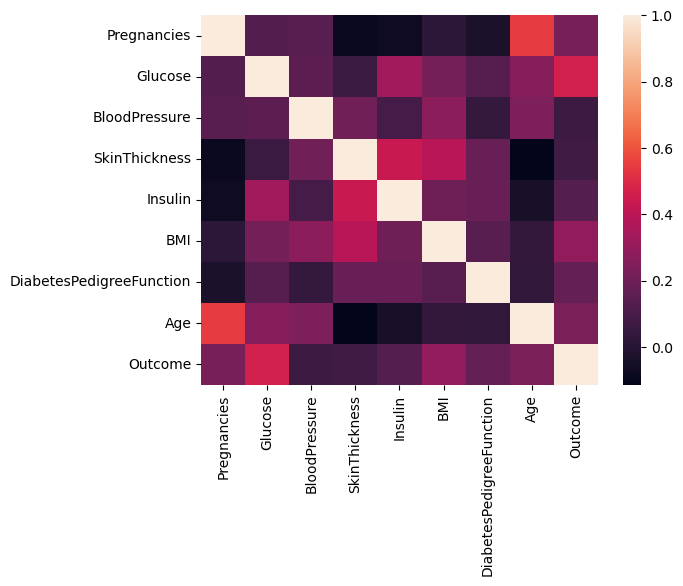

In [3]:
import seaborn as sns
sns.heatmap(diabetes.corr())

In [4]:
X=diabetes.drop("Outcome",axis=1)
y=diabetes['Outcome']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [5]:
diabetes.shape

(768, 9)

In [53]:
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import FunctionTransformer
import numpy as np

In [75]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from numpy import array
pipe=Pipeline(steps=[('FunctionTransformer',
                 FunctionTransformer(func=np.log1p)),
                ('scaling', StandardScaler()),
                ('model',
                 VotingClassifier(estimators=[('RFC', RandomForestClassifier()),
                                              ('LR', LogisticRegression()),
                                              ('SVC', SVC()),
                                              ('ETC',ExtraTreesClassifier()),
                                              ("DTC",DecisionTreeClassifier())]))])

In [76]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('FunctionTransformer',
                 FunctionTransformer(func=<ufunc 'log1p'>)),
                ('scaling', StandardScaler()),
                ('model',
                 VotingClassifier(estimators=[('RFC', RandomForestClassifier()),
                                              ('LR', LogisticRegression()),
                                              ('SVC', SVC()),
                                              ('ETC', ExtraTreesClassifier()),
                                              ('DTC',
                                               DecisionTreeClassifier())]))])

In [77]:
pipe.score(X_test,y_test)

0.8051948051948052

In [34]:
from pickle import load,dump

In [81]:
dump(pipe,open("pipe.pkl","wb"))

In [82]:
model=load(open("pipe.pkl",'rb'))

In [99]:
data=[9,121,89,34,0,38.8,0.02,38]
columns=["pregnancies","glucose","bloodpressure","skinthickness","insulin","bmi","diabetespedigreefunction","age"]
inp=pd.DataFrame({"pregnancies":6,"glucose":148,"bloodpressure":72,"skinthickness":35,"insulin":0,"bmi":33.6,"diabetespedigreefunction":0.627,"age":50},index=pd.RangeIndex(0,500))
model.predict(inp)[0]

D:\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- age
- bloodpressure
- bmi
- diabetespedigreefunction
- glucose
- ...
Feature names seen at fit time, yet now missing:
- Age
- BMI
- BloodPressure
- DiabetesPedigreeFunction
- Glucose
- ...

  warnings.warn(message, FutureWarning)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,